[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



a) color: {red, blue, green}

b) height: 6.10432 ft

c) number of participants: 587

d) area: 2,307.8604 ft^2

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

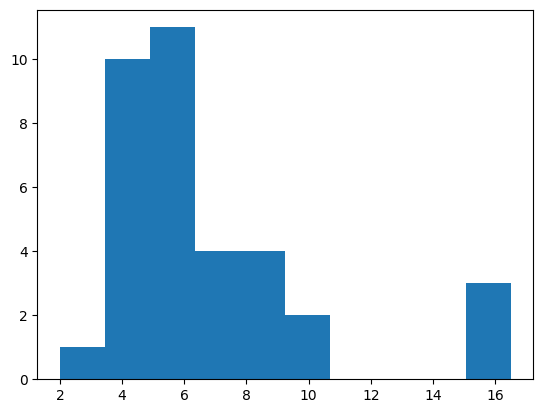

In [3]:
plt.hist(carbon_west['CO2'])
plt.show()

Part b. Find the mean, median, and standard deviation.

In [4]:
mean = carbon_west['CO2'].mean()
median = carbon_west['CO2'].median()
std = carbon_west['CO2'].std()

print("mean: ", mean)
print("median: ", median)
print("std: ", std)

mean:  6.717142857142858
median:  5.9
std:  3.3569493954627134


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [5]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [6]:
murders = pd.DataFrame(murders)
filtered_murders = murders[murders['state'] != 'DC']
mean = filtered_murders['murder'].mean()
std = filtered_murders['murder'].std()

print("mean: ", mean)
print("std: ", std)

mean:  4.874
std:  2.586291174793806


Part b. Find the five-number  summary without D.C.

In [7]:
filtered_murders_summary = filtered_murders['murder'].describe()
print(filtered_murders_summary)

count    50.000000
mean      4.874000
std       2.586291
min       1.000000
25%       2.625000
50%       4.850000
75%       6.175000
max      12.400000
Name: murder, dtype: float64


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [8]:
mean = murders['murder'].mean()
std = murders['murder'].std()
murders_summary = murders['murder'].describe()
print(murders_summary)
print("mean: ", mean)
print("std: ", std)

count    51.000000
mean      5.252941
std       3.725391
min       1.000000
25%       2.650000
50%       5.000000
75%       6.450000
max      24.200000
Name: murder, dtype: float64
mean:  5.252941176470588
std:  3.7253914125190373


The mean is effected more than the median by this outlier.
the range is effected more than the interquartile by this outlier.


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [9]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home.

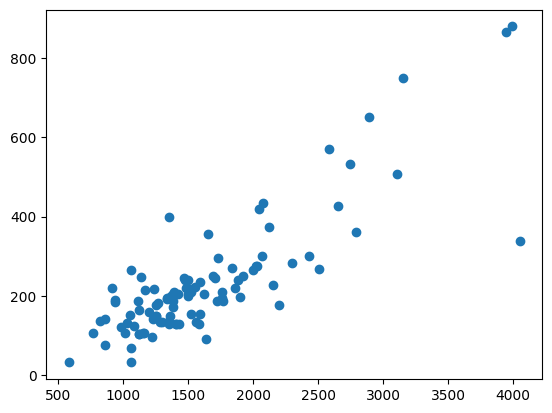

In [10]:

plt.scatter(houses['size'],houses['price'] )

Part b. Find the correlation between the two variables.

In [11]:
houses_corr = houses.corr()
print(houses_corr)

              case     price      size       new     taxes  bedrooms     baths
case      1.000000 -0.160177 -0.053307  0.041632 -0.021201 -0.011823  0.051479
price    -0.160177  1.000000  0.833785  0.473261  0.841980  0.393957  0.558253
size     -0.053307  0.833785  1.000000  0.384328  0.818796  0.544783  0.658225
new       0.041632  0.473261  0.384328  1.000000  0.380874  0.049316  0.251481
taxes    -0.021201  0.841980  0.818796  0.380874  1.000000  0.473929  0.594854
bedrooms -0.011823  0.393957  0.544783  0.049316  0.473929  1.000000  0.492222
baths     0.051479  0.558253  0.658225  0.251481  0.594854  0.492222  1.000000


Part c. Find and plot the regression line on top of the scatterplot.

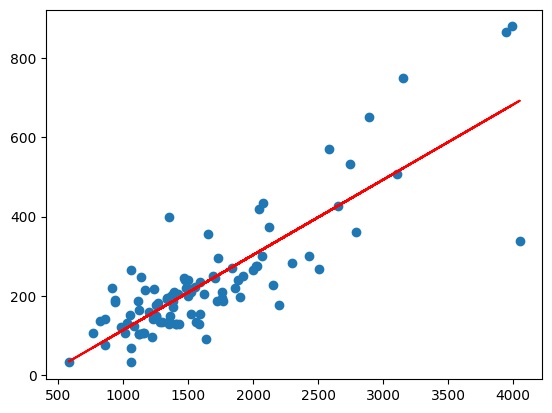

In [12]:
import numpy as np
plt.scatter(houses['size'],houses['price'] )
slope, intercept = np.polyfit(houses['size'], houses['price'], 1)
plt.plot(houses['size'], slope*houses['size'] + intercept, color='red')
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

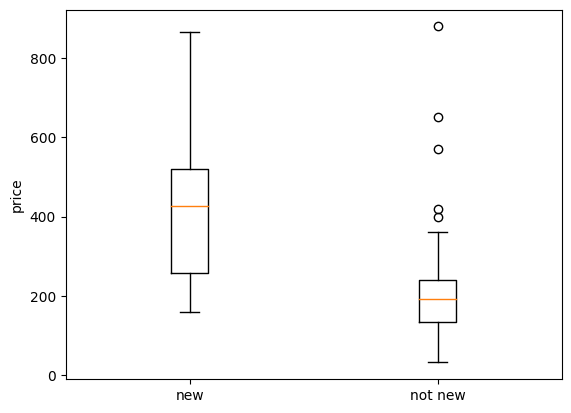

In [13]:
plt.boxplot([houses[houses['new'] == 1]['price'], houses[houses['new'] == 0]['price']])
plt.xticks([1, 2], ['new', 'not new'])
plt.ylabel('price')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

There is a strong, positive, and mostly linear relationship between size and price. This can be seen by the upward trend in the regression line on the scatter plot.

Prices are also clearly correlated to the "new"/"not new" attribute of the house. Prices of new houses have a tighter range than those that are not new. The median price of newer homes is also higher than those that are not new.


**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [14]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep="\s+")

In [15]:
happy

,subject,happiness,marital,gender
0,1,1,1,male
1,2,1,1,male
2,3,1,1,male
3,4,1,1,male
4,5,1,1,male
...,...,...,...,...
2137,2138,3,3,female
2138,2139,3,3,female
2139,2140,3,3,female
2140,2141,3,3,female


In [16]:
pd.crosstab(happy['marital'], happy['happiness'])

happiness,1,2,3
marital,,,
1,432,504,61
2,92,282,103
3,124,409,135
